In [1]:
from ipywidgets import interact
from ipywidgets import widgets
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log
%matplotlib inline

In [20]:
def show_image(path, x, y, z):
    img = nb.load(path).get_data()[..., 0]
    #mask = np.zeros_like(img)
    #mask[10:160, 110:190, 45:160] = 1
    #img = img * mask
    limits = (0, 2000)
    fig = plt.figure(figsize=(20, 20)) 
    plt.subplot(1, 3, 1)
    plt.imshow(img[:, :, z],
                        cmap=plt.cm.gray,
                        interpolation='none'
                        )
    plt.subplot(1, 3, 2)
    plt.imshow(img[:, y, :],
                        cmap=plt.cm.gray,
                        interpolation='none'
                        )
    plt.subplot(1, 3, 3)
    plt.imshow(img[x, :, :],
                        cmap=plt.cm.gray,
                        interpolation='none'
              )
    segmentation_seed = np.zeros(img.shape, dtype=np.uint8)
    segmentation_seed[img == 0] = 1
    segmentation_seed[np.logical_and(img > 0, img < 300)] = 2
    segmentation_seed[np.logical_and(img > 650, img < 850)] = 3
    segmentation_seed[np.logical_and(img > 1050, img < 1450)] = 4     
    fig = plt.figure(figsize=(20, 20)) 
    plt.subplot(1, 3, 1)
    plt.imshow(np.rot90(segmentation_seed[:, :, z]),
                        cmap=plt.cm.gray,
                        interpolation='none'
                        )
    plt.clim(*limits)
    plt.subplot(1, 3, 2)
    plt.imshow(np.rot90(segmentation_seed[:, y, :]),
                        cmap=plt.cm.gray,
                        interpolation='none'
                        )
    plt.clim(*limits)
    plt.subplot(1, 3, 3)
    plt.imshow(np.rot90(segmentation_seed[x, :, :]),
                        cmap=plt.cm.gray,
                        interpolation='none'
              )
    plt.clim(*limits)
    plt.figure()
    plt.hist(img[img > 0].flatten(), bins=256)
    plt.yscale('log', nonposy='clip')

<function __main__.show_image>

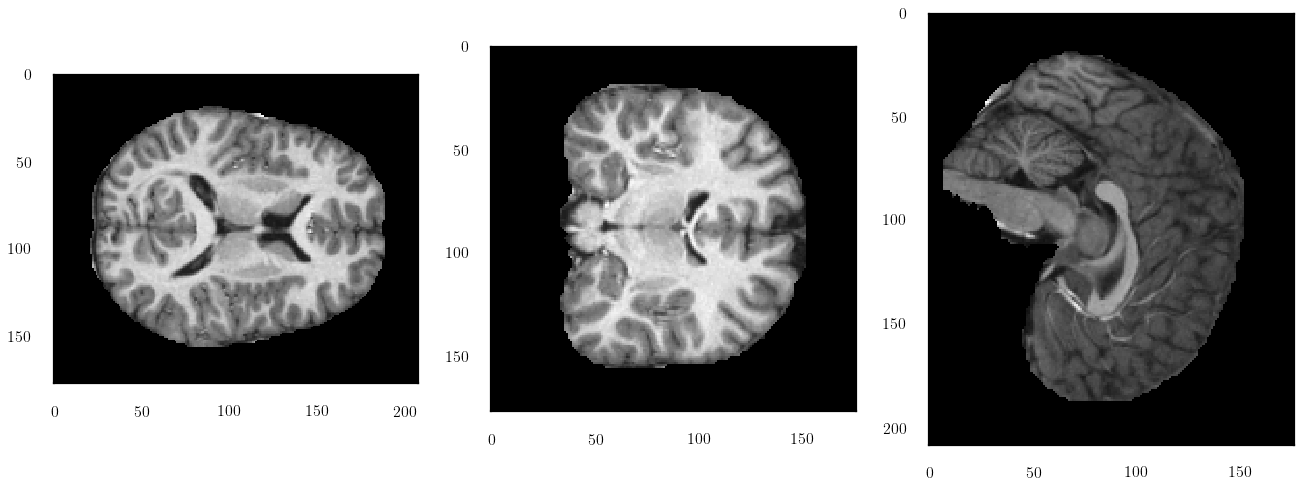

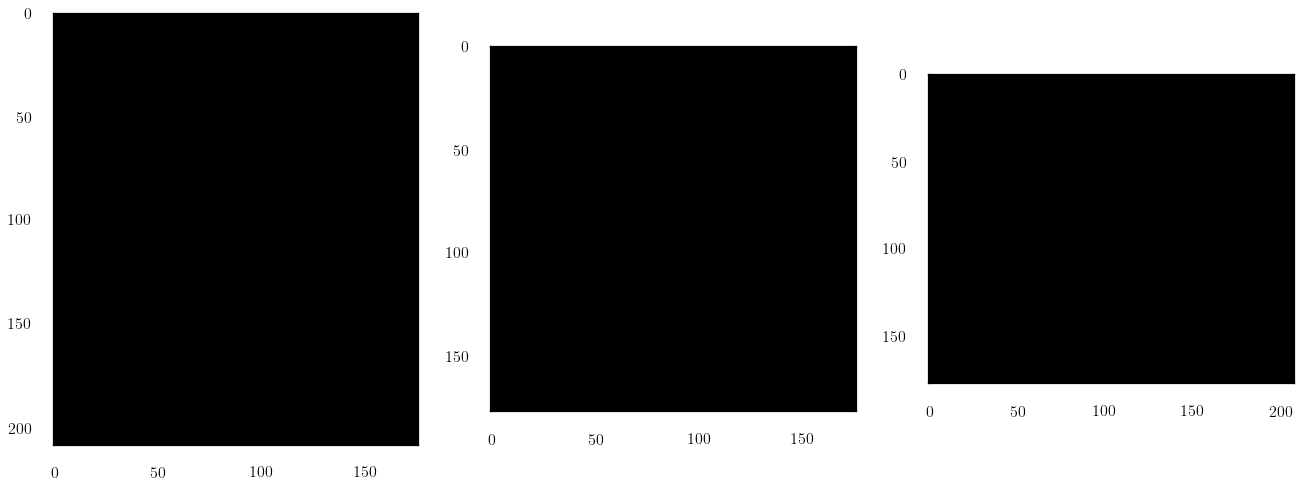

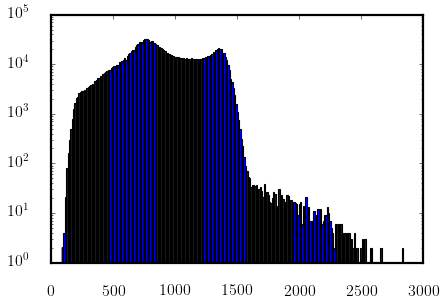

In [21]:
shape = (176, 208, 176)
path = widgets.Text("../data/set_train/train_1.nii")
interact(
    show_image,
    path=path,
    x=widgets.IntSlider(min=0, max=shape[0] - 1, step=1, value=shape[0] // 2),
    y=widgets.IntSlider(min=0, max=shape[1] - 1, step=1, value=shape[1] // 2),
    z=widgets.IntSlider(min=0, max=shape[2] - 1, step=1, value=shape[2] // 2),
)